# Rejection Sampling

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Ex. 1: Rejection sampling from normal distribution. We are going to assume that we don't know how to sample from a normal distribution. Someone gave us the pdf and we're going to use rejection sampling to sample from it. It'll be similar to generating samples using np.random.normal(mu, sig, n_samples)

## PDF of a uniform distribution U(a, b)

$ f(a, b) = \begin{cases}
   \dfrac{1}{b - a} & \text{if } a < x < b \\
   0 & \text{otherwise } 
\end{cases} 
$

In [16]:
# returns an array with length of x having each element as  1/(b-a)
def uniformpdf(a, b, x):
    return (1 / (b - a)) * np.ones(len(x))

## PDF of a normal distribution N($\mu$, $\sigma^2$) 
$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $

In [17]:
def normalpdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp((-0.5)*((x - mu)**2 / sigma**2))


In [18]:
x = np.linspace(-5, 5, 1000) # x axis

# The support has to match between 
# the proposal and function from which 
# we wish to sample from
a = -5 # left bound of uniform
b = 5 # right bound of uniform

## Plotting normal curve using pdf, histogram of normal samples, uniform distribution that is going to be used as the instrumental/proposal distribution.

## This orange histogram below is sampling using numpy's np.random.normal function. We're going to use rejection sampling to do the same.

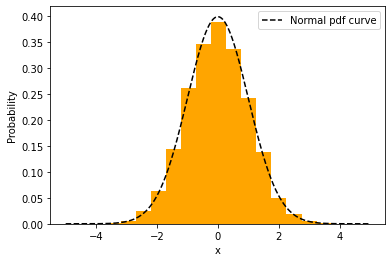

In [19]:
# Plot a normal curve mu=0, sig=1
mu = 0
sig = 1

plt.plot(x, normalpdf(x, mu, sig), 'k--', label='Normal pdf curve')

normdata = np.random.normal(mu, sig, 10000)
n, bins, patches = plt.hist(normdata, bins=15, density=True, facecolor='orange')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()

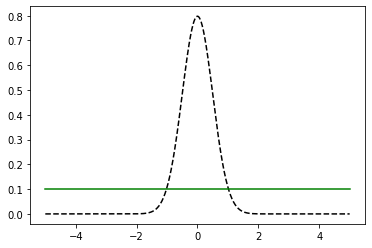

In [20]:

mu = 0
sig = 0.5
# Plot a normal curve mu=0, sig=1
x = np.linspace(-5, 5, 1000)
plt.plot(x, normalpdf(x, mu, sig), 'k--')

# Plot a uniform curve
plt.plot(x, uniformpdf(a, b, x), 'g-')

## Find out the peak of the normal curve to know how much we have to scale up the uniform distribution to envelope the normal curve.

## We take the derivative and set it to zero to find the peak. Here we can see that it happens at x = 0 where the mean of the normal distribution is.

$ f′(x)= −\dfrac{x \ f(x)}{\sigma^2} = - \dfrac{x}{\sigma^3 \ \sqrt{2\pi}} e^{-\dfrac{x^2}{2 \sigma^2}} \\
f'(x) = 0 => x = 0 \\
max \ at \ f'(x=0) \\
c = max(f(x)/g(x))$

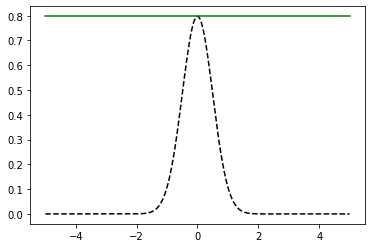

In [21]:
maxvalnormalpdf = normalpdf(0, mu, sig)
maxvaluniformpdf = 1 / (b-a)

c = maxvalnormalpdf / maxvaluniformpdf

# Plot normal curve
plt.plot(x, normalpdf(x, mu, sig), 'k--')

# Plot a uniform curve
plt.plot(x, c * uniformpdf(a, b, x), 'g')

## Rejection sampling using uniform(a, b) as instrumental distribution to propose candidate samples

In [22]:
accepted = []
rejected = []
N = 100000

for i in range(N):
    candidate = np.random.uniform(a, b)
    u = np.random.uniform(0, 1)
    if u < normalpdf(candidate, mu, sig) / c * (1 / (b - a)):
        accepted.append(candidate)
    else:
        rejected.append(candidate)


print("Accepted: (",len(accepted),"):", len(accepted) / N * 100, "%")
print("Rejected: (",len(rejected),"):", len(rejected) / N * 100, "%")

Accepted: ( 115 ): 0.11499999999999999 %
Rejected: ( 99885 ): 99.885 %


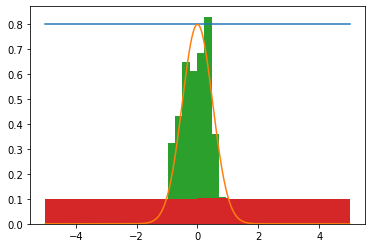

In [23]:
# Plot a uniform curve
plt.plot(x, c * uniformpdf(a, b, x))

# Plot normal curve
plt.plot(x, normalpdf(x, mu, sig))
hacc = plt.hist(accepted, density=True)
hrej = plt.hist(rejected, density=True)

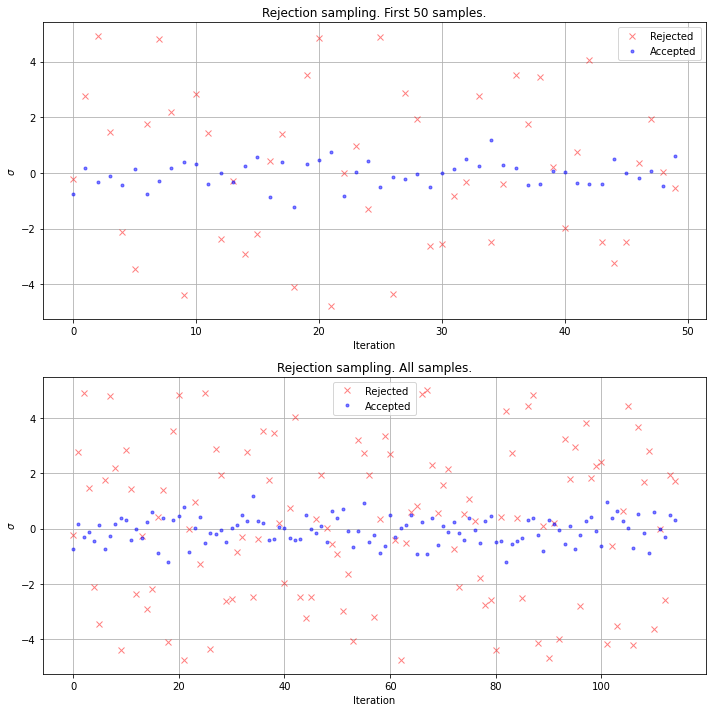

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Rejection sampling. First 50 samples.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=len(accepted)
ax2.plot( rejected[0:to_show], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[0:to_show], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Rejection sampling. All samples.")
ax2.grid()
ax2.legend()



fig.tight_layout()

# Ex. 2: Rejection sampling from a bimodal distribution

In [25]:
def bimodal(x, mu, sigma):
    return np.exp((-1)*((x - mu)**2 / sigma**2)) + np.exp(-(x-mu-2)**2)

## Plotting function which is proportional to pdf, histogram of normal samples, uniform distribution that is going to be used as the instrumental/proposal distribution.

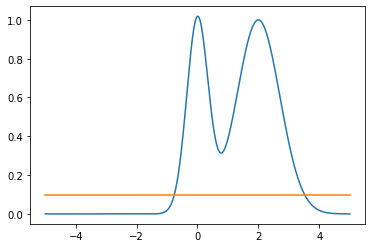

In [26]:
a = -5 # left bound of uniform
b = 5 # right bound of uniform
mu = 0
sig = 0.5
# Plot a normal curve mu=0, sig=1
x = np.linspace(-5, 5, 1000)
plt.plot(x, bimodal(x, mu, sig))

# Plot a uniform curve
plt.plot(x, uniformpdf(a, b, x))

## Find out the peak of the normal curve to know how much we have to scale up the uniform distribution to envelope the normal curve.

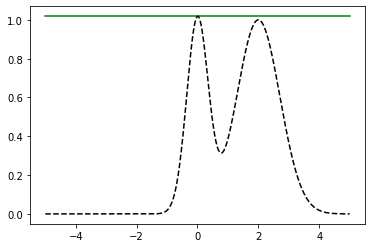

In [27]:
maxvalf = bimodal(0, mu, sig)
maxvaluniformpdf = 1 / (b-a)

c = maxvalf / maxvaluniformpdf

# Plot a uniform curve
plt.plot(x, c * uniformpdf(a, b, x), 'g')

# Plot normal curve
plt.plot(x, bimodal(x, mu, sig), 'k--')

## Rejection sampling using uniform(a, b) as instrumental distribution to propose candidate samples

In [28]:
accepted = []
rejected = []
N = 100000

for i in range(N):
    candidate = np.random.uniform(a, b)
    u = np.random.uniform(0, 1)
    if u < bimodal(candidate, mu, sig) / c * (1 / (b - a)):
        accepted.append(candidate)
    else:
        rejected.append(candidate)


print("Accepted: (",len(accepted),"):", len(accepted) / N * 100, "%")
print("Rejected: (",len(rejected),"):", len(rejected) / N * 100, "%")

Accepted: ( 250 ): 0.25 %
Rejected: ( 99750 ): 99.75 %


## Only less than 1% of samples are being accepted. The efficiency of rejection sampling is poor and it would take a high number of proposals to have enough samples from our desired distribution

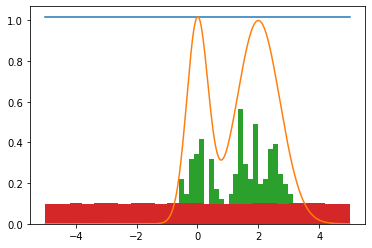

In [29]:
# Plot a uniform curve
plt.plot(x, c * uniformpdf(a, b, x))

# Plot normal curve
plt.plot(x, bimodal(x, mu, sig))
hacc = plt.hist(accepted, bins=25, density=True)
hrej = plt.hist(rejected, bins=25, density=True)

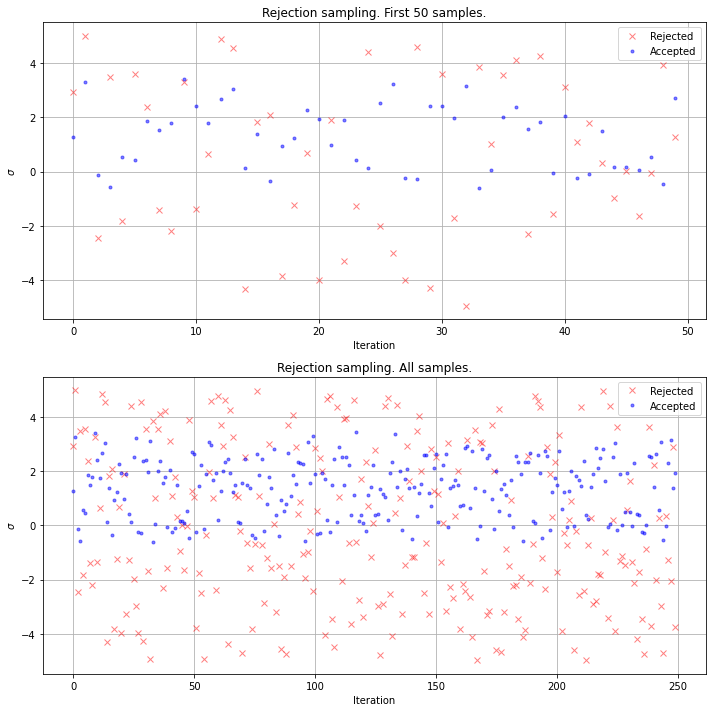

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Rejection sampling. First 50 samples.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=len(accepted)
ax2.plot( rejected[0:to_show], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[0:to_show], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Rejection sampling. All samples.")
ax2.grid()
ax2.legend()



fig.tight_layout()